<a href="https://colab.research.google.com/github/mcmaharrey/MLA_MCM/blob/main/MLA1_MCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Assignment 1** <br>
**Matthew Maharrey** <br>
**CS430-ON** <br>
**Machine Learning in the Cloud**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/weather_2012.csv')

In [6]:
df.head()


,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [10]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
144,1/7/2012 0:00,-8.7,-11.7,79,6,16.1,100.13,Cloudy
3420,5/22/2012 12:00,18.4,16.3,88,15,19.3,100.78,Rain
4890,7/22/2012 18:00,29.2,16.9,47,20,48.3,100.99,Mostly Cloudy
7558,11/10/2012 22:00,0.9,-4.6,67,11,25.0,102.55,Mainly Clear
2743,4/24/2012 7:00,5.5,3.0,84,13,11.3,98.60,Rain Showers


In [11]:
df.columns.tolist()

['Date/Time',
 'Temp (C)',
 'Dew Point Temp (C)',
 'Rel Hum (%)',
 'Wind Spd (km/h)',
 'Visibility (km)',
 'Stn Press (kPa)',
 'Weather']

In [13]:
new_columns = {
    'Date/Time': 'date_time',
    'Temp (C)': 'temp_c',
    'Dew Point Temp (C)': 'dew_point',
    'Rel Hum (%)': 'relative_humidity',
    'Wind Spd (km/h)': 'wind_speed',
    'Visibility (km)': 'visibility',
    'Stn Press (kPa)': 'pressure',
    'Weather': 'weather'
}

df = df.rename(columns=new_columns)

df.head()

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [15]:
statistics = df.describe()
statistics

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [18]:
df['temp_f']= (df['temp_c'] * 9/5) + 32

df.head()

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather,temp_f
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30


In [20]:
df = df[['date_time', 'temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']]

df.head()

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,1/1/2012 0:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog


In [21]:
df.dtypes

date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object

In [22]:
df['date_time'] = pd.to_datetime(df['date_time'])

df.dtypes

date_time            datetime64[ns]
temp_f                      float64
temp_c                      float64
dew_point                   float64
relative_humidity             int64
wind_speed                    int64
visibility                  float64
pressure                    float64
weather                      object
dtype: object

In [23]:
monthly_avg = df.groupby(df['date_time'].dt.month)['temp_f'].mean()

monthly_avg

date_time
1     18.731290
2     24.395000
3     37.618226
4     44.616750
5     61.227984
6     68.241250
7     73.022097
8     72.102742
9     61.672000
10    51.718952
11    33.676500
12    26.048629
Name: temp_f, dtype: float64

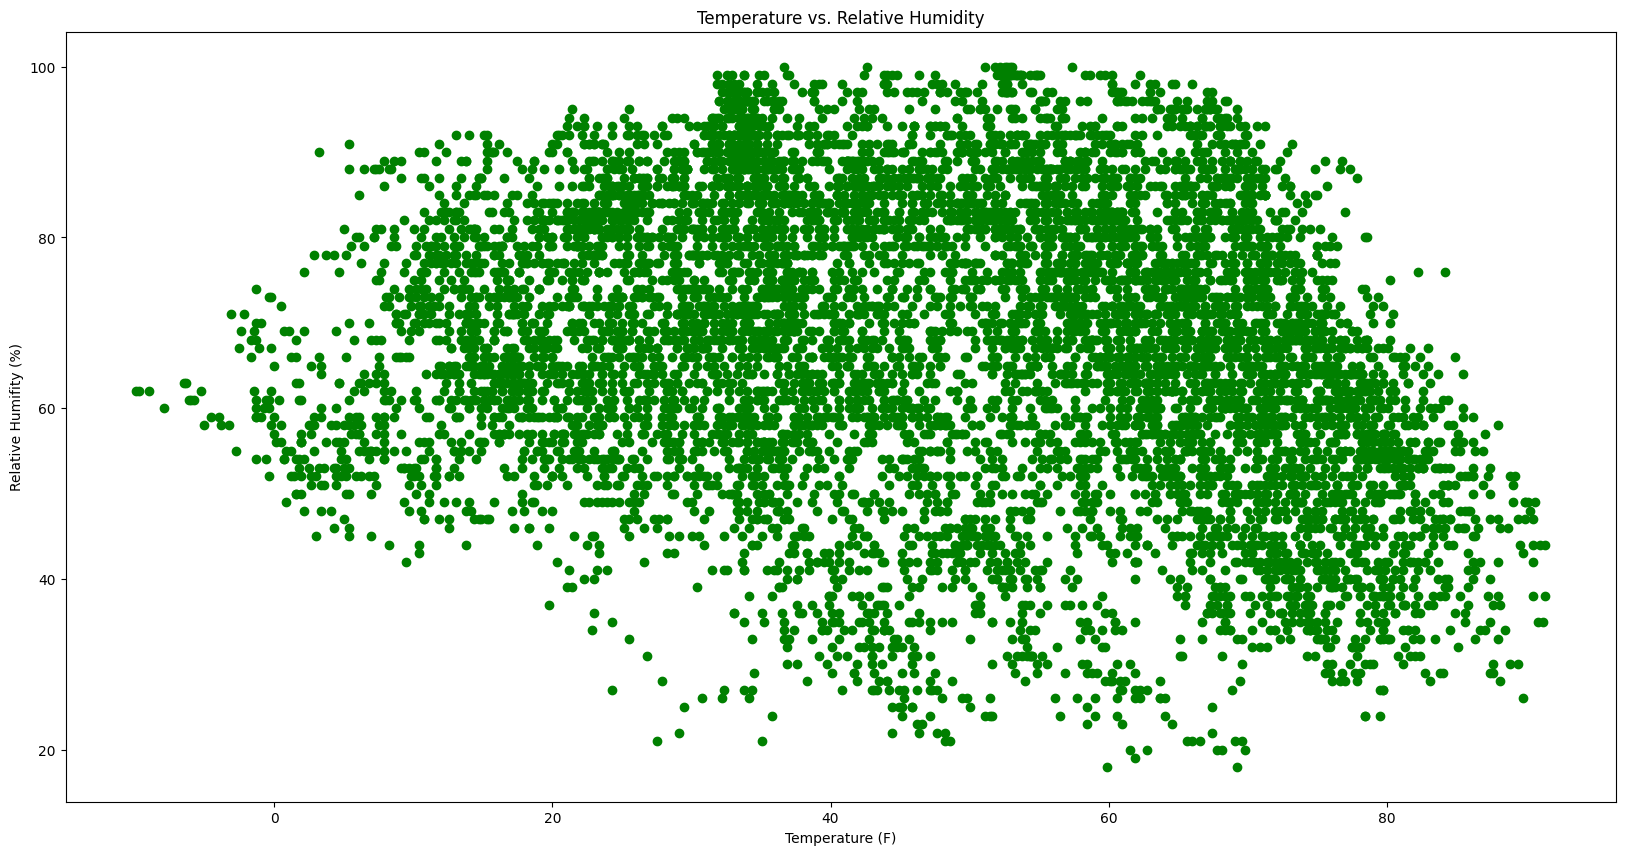

In [26]:
plt.figure(figsize=(20,10))

plt.scatter(df['temp_f'], df['relative_humidity'], alpha=1, color='green')

plt.xlabel('Temperature (F)')
plt.ylabel('Relative Humifity (%)')
plt.title('Temperature vs. Relative Humidity')

plt.show()

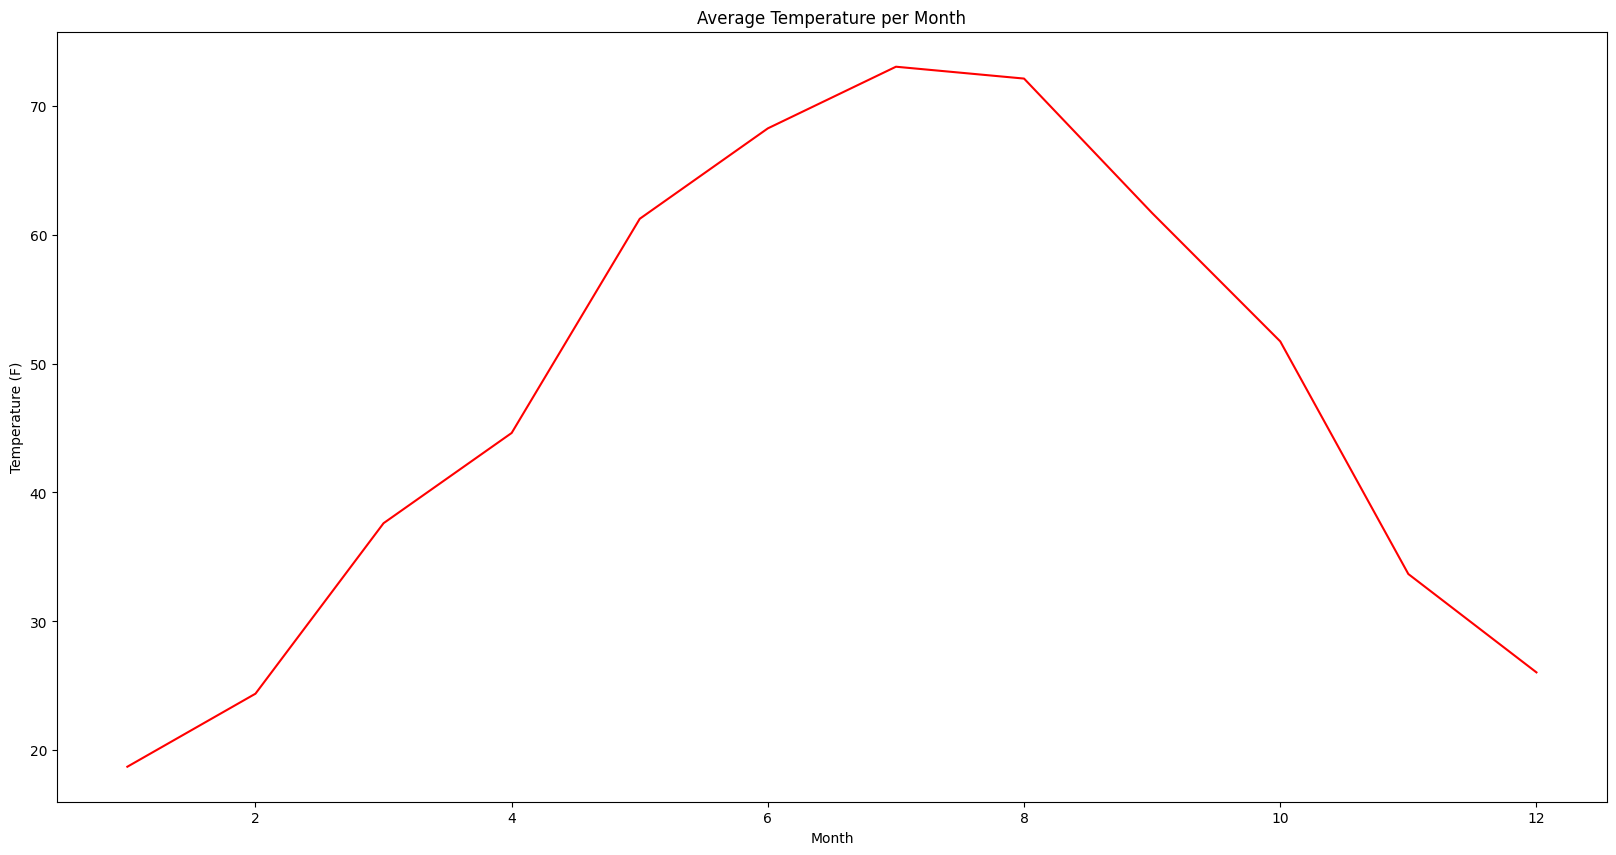

In [41]:
monthly_avg_temp = df.groupby(df['date_time'].dt.month)['temp_f'].mean()

plt.figure(figsize=(20, 10))

plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, color='red')

plt.xlabel('Month')
plt.ylabel('Temperature (F)')
plt.title('Average Temperature per Month')

plt.show()

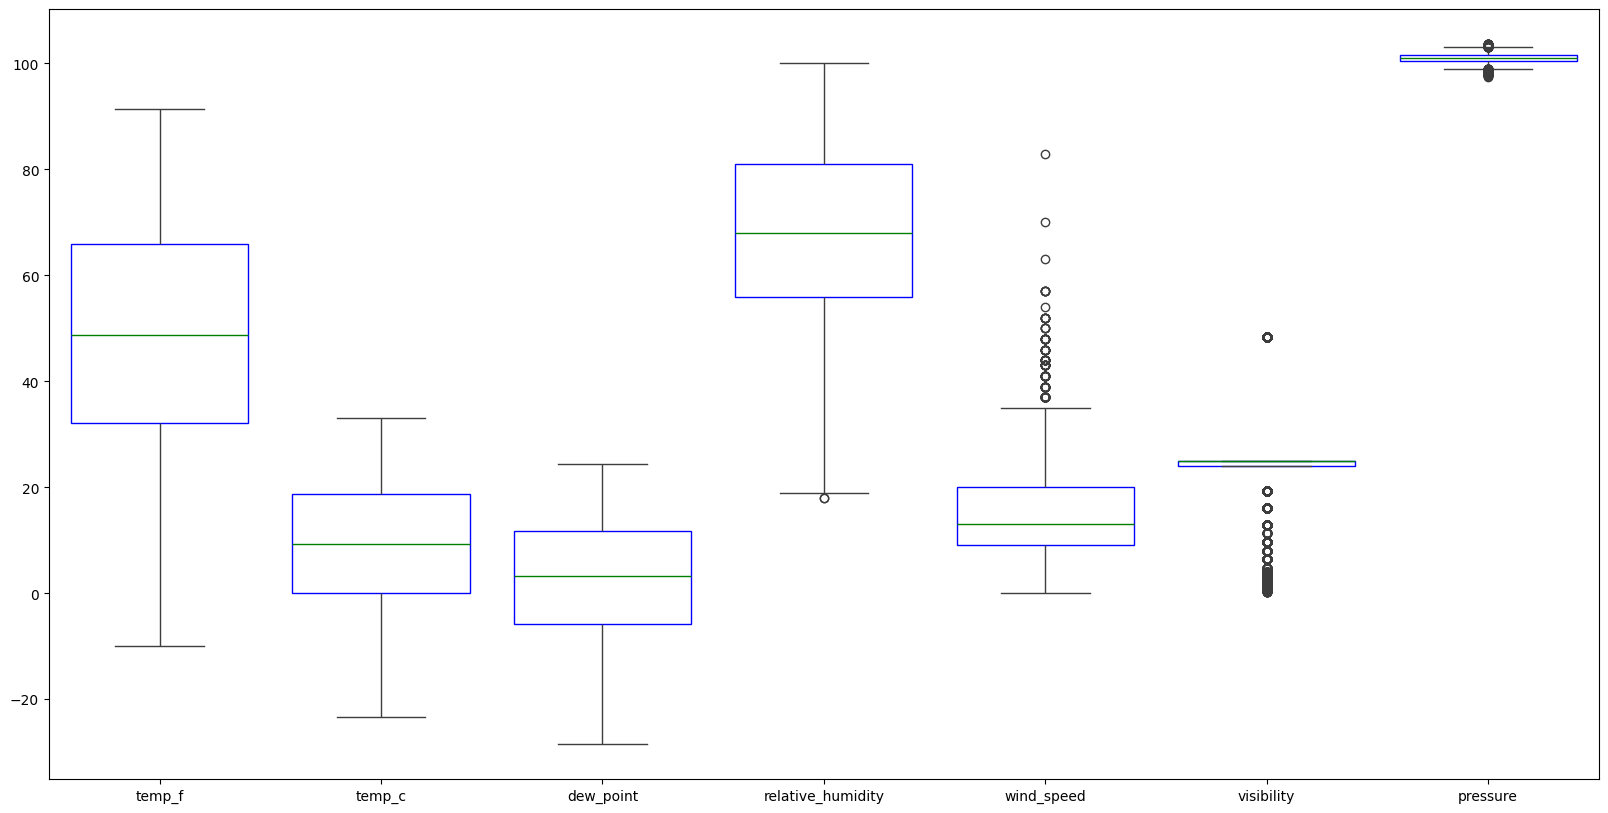

In [42]:
plt.figure(figsize=(20, 10))

columns_for_boxplot = ['temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure']

sns.boxplot(data=df[columns_for_boxplot],color='white',boxprops=dict(edgecolor='blue'), medianprops=dict(color='green'))

plt.show()